## STEP 1: IMPORT ALL REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display
import pickle

## STEP 2: IMPORT LIBRARIES & LOAD DATA

In [3]:
df = pd.read_csv("Data/amazon_all_electronics_data.csv")

# See first few rows of the data
print(df.head())

# Check shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Check column names
print("Columns in dataset:", df.columns)

                                        Product_Name    Price  Rating  \
0                   Apple iPhone 15 (128 GB) - Black  47999.0     4.5   
1                    Apple iPhone 15 (128 GB) - Blue  48499.0     4.5   
2  Samsung Galaxy S24 Ultra 5G AI Smartphone with...  75749.0     4.5   
3  Samsung Original 25W Type-C Travel Adaptor Wit...    889.0     4.4   
4  realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...   9898.0     4.2   

   Review_Count        ASIN  \
0          6013  B0CHX1W1XY   
1          6013  B0CHX2F5QT   
2          4419  B0CS5XW6TN   
3         44669  B0D2R2MXXJ   
4          1242  B0F9TT7Z5Q   

                                         Product_URL Availability  
0  https://www.amazon.in/Apple-iPhone-15-128-GB/d...     In Stock  
1  https://www.amazon.in/Apple-iPhone-15-128-GB/d...     In Stock  
2  https://www.amazon.in/Samsung-Galaxy-Smartphon...     In Stock  
3  https://www.amazon.in/Samsung-Original-Type-C-...     In Stock  
4  https://www.amazon.in/realme-Lo

## STEP 3: BASIC EDA (Exploratory Data Analysis)

In [4]:
# Check first few rows
print("Preview of data:")
print(df.head(), "\n")

# Check shape
print("Shape of dataset:", df.shape, "\n")

# Check column data types
print("Data Types:")
print(df.dtypes, "\n")

# Check missing values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe(), "\n")

Preview of data:
                                        Product_Name    Price  Rating  \
0                   Apple iPhone 15 (128 GB) - Black  47999.0     4.5   
1                    Apple iPhone 15 (128 GB) - Blue  48499.0     4.5   
2  Samsung Galaxy S24 Ultra 5G AI Smartphone with...  75749.0     4.5   
3  Samsung Original 25W Type-C Travel Adaptor Wit...    889.0     4.4   
4  realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...   9898.0     4.2   

   Review_Count        ASIN  \
0          6013  B0CHX1W1XY   
1          6013  B0CHX2F5QT   
2          4419  B0CS5XW6TN   
3         44669  B0D2R2MXXJ   
4          1242  B0F9TT7Z5Q   

                                         Product_URL Availability  
0  https://www.amazon.in/Apple-iPhone-15-128-GB/d...     In Stock  
1  https://www.amazon.in/Apple-iPhone-15-128-GB/d...     In Stock  
2  https://www.amazon.in/Samsung-Galaxy-Smartphon...     In Stock  
3  https://www.amazon.in/Samsung-Original-Type-C-...     In Stock  
4  https://www.am

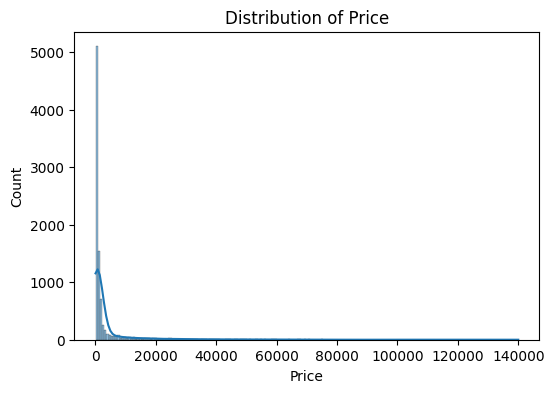

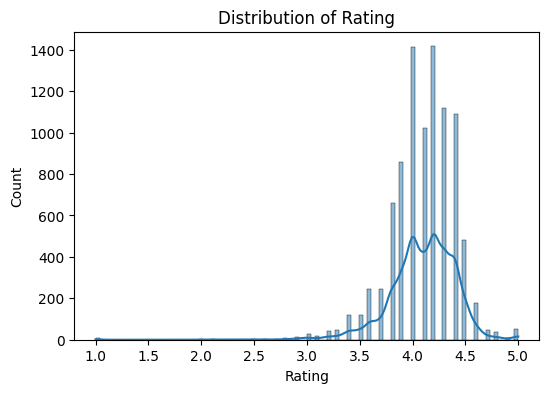

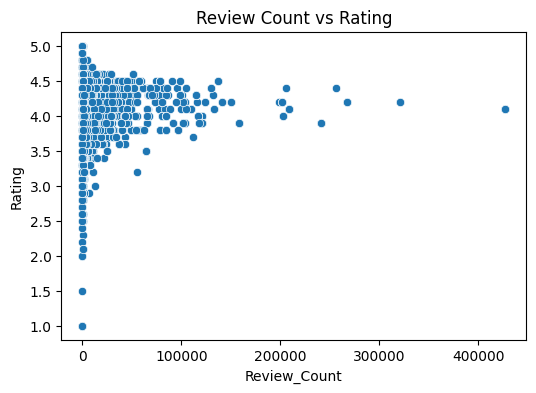

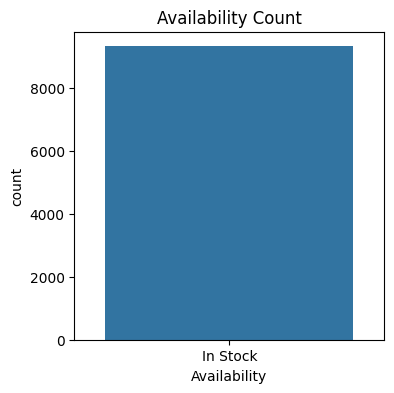

<Figure size 600x600 with 0 Axes>

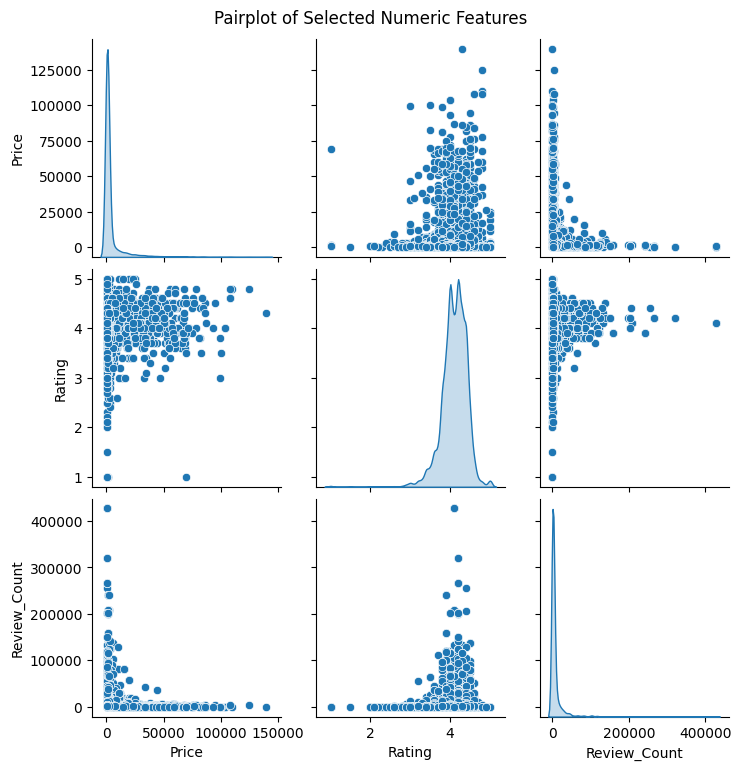

In [8]:
# Distribution of Price
plt.figure(figsize=(6,4))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Price")
plt.show()

# Distribution of Rating
plt.figure(figsize=(6,4))
sns.histplot(df["Rating"], kde=True)
plt.title("Distribution of Rating")
plt.show()

# Relationship: Review_Count vs Rating
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Review_Count", y="Rating")
plt.title("Review Count vs Rating")
plt.show()

# Availability count
plt.figure(figsize=(4,4))
sns.countplot(data=df, x="Availability")
plt.title("Availability Count")
plt.show()

plt.figure(figsize=(6,6))
pairplot_cols = ["Price","Rating","Review_Count","Popularity_Score","Log_Price","Log_Review_Count","Rating_Review_Interaction"]
pairplot_cols = [col for col in pairplot_cols if col in df.columns]
sns.pairplot(df[pairplot_cols], diag_kind="kde")
plt.suptitle("Pairplot of Selected Numeric Features", y=1.02)
plt.show()

## STEP 4: DATA CLEANING

In [6]:
# Make a copy so original stays safe
df_clean = df.copy()

# Check missing values
print("Missing values BEFORE cleaning:")
print(df_clean.isnull().sum())

# Fill missing Price and Rating (simple beginner method)
# Using median because it is safer for skewed data
df_clean["Price"] = df_clean["Price"].fillna(df_clean["Price"].median())
df_clean["Rating"] = df_clean["Rating"].fillna(df_clean["Rating"].median())

# Clean 'Availability' column: Convert In Stock → 1, Out of Stock → 0
df_clean["Availability"] = df_clean["Availability"].map({"In Stock": 1, "Out of Stock": 0})

# Drop columns we don't need for prediction (simple version)
# Product_URL is not useful for ML
df_clean = df_clean.drop(columns=["Product_URL"])

# Check missing values AGAIN after cleaning
print("\nMissing values AFTER cleaning:")
print(df_clean.isnull().sum())

# Show cleaned preview
print("\nCLEANED DATA PREVIEW:")
print(df_clean.head())

Missing values BEFORE cleaning:
Product_Name     0
Price           66
Rating          36
Review_Count     0
ASIN             0
Product_URL      0
Availability     0
dtype: int64

Missing values AFTER cleaning:
Product_Name    0
Price           0
Rating          0
Review_Count    0
ASIN            0
Availability    0
dtype: int64

CLEANED DATA PREVIEW:
                                        Product_Name    Price  Rating  \
0                   Apple iPhone 15 (128 GB) - Black  47999.0     4.5   
1                    Apple iPhone 15 (128 GB) - Blue  48499.0     4.5   
2  Samsung Galaxy S24 Ultra 5G AI Smartphone with...  75749.0     4.5   
3  Samsung Original 25W Type-C Travel Adaptor Wit...    889.0     4.4   
4  realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...   9898.0     4.2   

   Review_Count        ASIN  Availability  
0          6013  B0CHX1W1XY             1  
1          6013  B0CHX2F5QT             1  
2          4419  B0CS5XW6TN             1  
3         44669  B0D2R2MXXJ    

## STEP 5: FEATURE ENGINEERING

In [16]:
# Length of product name
df_clean["Name_Length"] = df_clean["Product_Name"].apply(len)

# Count how many words are in the product name
df_clean["Word_Count"] = df_clean["Product_Name"].apply(lambda x: len(x.split()))

# Extract first word as a simple category (brand/category)
df_clean["Category"] = df_clean["Product_Name"].apply(lambda x: x.split()[0])

# Label encode this Category
le = LabelEncoder()
df_clean["Category_Encoded"] = le.fit_transform(df_clean["Category"])

# Show updated dataset
print("FEATURE ENGINEERING DONE. PREVIEW:")
print(df_clean.head())

FEATURE ENGINEERING DONE. PREVIEW:
                                        Product_Name    Price  Rating  \
0                   Apple iPhone 15 (128 GB) - Black  47999.0     4.5   
1                    Apple iPhone 15 (128 GB) - Blue  48499.0     4.5   
2  Samsung Galaxy S24 Ultra 5G AI Smartphone with...  75749.0     4.5   
3  Samsung Original 25W Type-C Travel Adaptor Wit...    889.0     4.4   
4  realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...   9898.0     4.2   

   Review_Count        ASIN  Availability  Name_Length  Word_Count Category  \
0          6013  B0CHX1W1XY             1           32           7    Apple   
1          6013  B0CHX2F5QT             1           31           7    Apple   
2          4419  B0CS5XW6TN             1          170          28  Samsung   
3         44669  B0D2R2MXXJ             1           63           9  Samsung   
4          1242  B0F9TT7Z5Q             1          188          30   realme   

   Category_Encoded  
0               122  
1      

## STEP 6: TRAIN-TEST-SPLIT

In [38]:
# Select useful features (X) for prediction
X = df_clean[["Rating", "Review_Count", "Availability",
              "Name_Length", "Word_Count", "Category_Encoded"]]

# Target variable (y) → Price
y = df_clean["Price"]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7454, 6)
X_test shape: (1864, 6)
y_train shape: (7454,)
y_test shape: (1864,)


## STEP 7: MODEL BUILDING

In [21]:
# Create model objects
lr_model = LinearRegression()                     # Linear Regression
rf_model = RandomForestRegressor(random_state=42) # Random Forest
dt_model = DecisionTreeRegressor(random_state=42) # Decision Tree

# Train the models on training data
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions on test data
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name, X_test):
    print(f"\n----- {model_name} PERFORMANCE -----")
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Adjusted R2 formula
    n = len(y_true)              # number of rows
    k = X_test.shape[1]          # number of features
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

    print("MAE :", mae)
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("Adjusted R2:", adj_r2)

# Evaluate all models
evaluate_model(y_test, lr_pred, "Linear Regression", X_test)
evaluate_model(y_test, rf_pred, "Random Forest", X_test)
evaluate_model(y_test, dt_pred, "Decision Tree", X_test)


----- Linear Regression PERFORMANCE -----
MAE : 5069.714239260801
MSE : 93624296.51242371
RMSE: 9675.964887928423
R2 Score: 0.0038483538234218573
Adjusted R2: 0.0006297701524152766

----- Random Forest PERFORMANCE -----
MAE : 2682.0581125400026
MSE : 38847932.891632095
RMSE: 6232.810994377424
R2 Score: 0.586662503836049
Adjusted R2: 0.585327003040689

----- Decision Tree PERFORMANCE -----
MAE : 3004.679948906601
MSE : 79060918.92102171
RMSE: 8891.620713965576
R2 Score: 0.15880100075349624
Adjusted R2: 0.15608307183832182


## STEP 8 — FEATURE IMPORTANCE


FEATURE IMPORTANCE TABLE:
            Feature  Importance
5  Category_Encoded    0.373110
1      Review_Count    0.238325
3       Name_Length    0.178991
4        Word_Count    0.110850
0            Rating    0.098724
2      Availability    0.000000


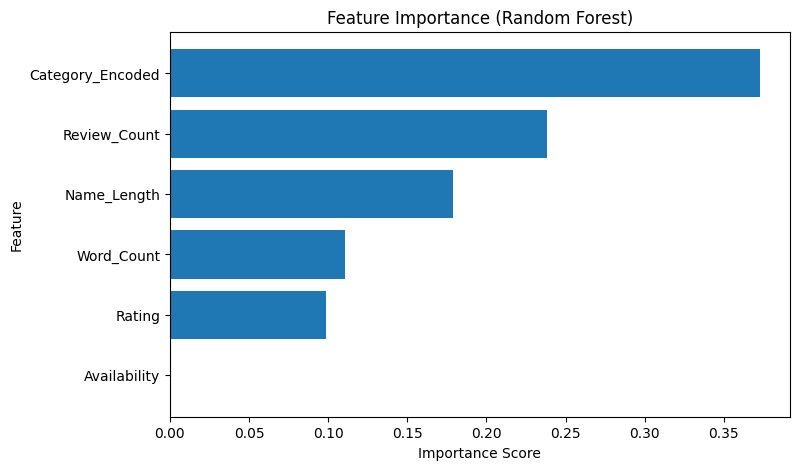

In [22]:
# 1. Get feature importance values from the random forest model
importances = rf_model.feature_importances_

# 2. Match them with feature names
feature_names = X_train.columns

# 3. Create a table
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# 4. Sort by top important features
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print("\nFEATURE IMPORTANCE TABLE:")
print(importance_df)

# 5. Plot the importance
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()   # highest at top
plt.show()

## STEP 9: SAVE THE TRAINED MODEL

In [40]:
# 1. LOAD THE DATA
df = pd.read_csv("Data/amazon_all_electronics_data.csv")

# 2. DATA CLEANING
df_clean = df.copy()

# Fixing missing value
df_clean["Price"] = df_clean["Price"].fillna(df_clean["Price"].median())
df_clean["Rating"] = df_clean["Rating"].fillna(df_clean["Rating"].median())

# Convert Availability to numbers
df_clean["Availability"] = df_clean["Availability"].map({"In Stock": 1,"Out of Stock": 0})

# Remove columns not useful for ML
df_clean = df_clean.drop(columns=["Product_URL"])

# 3. FEATURE ENGINEERING

# Length of product name
df_clean["Name_Length"] = df_clean["Product_Name"].apply(len)

# Word count in the name
df_clean["Word_Count"] = df_clean["Product_Name"].apply(lambda x: len(x.split()))

# First word as category
df_clean["Category"] = df_clean["Product_Name"].apply(lambda x: x.split()[0])

# Label encode Category
le = LabelEncoder()
df_clean["Category_Encoded"] = le.fit_transform(df_clean["Category"])

# 4. DEFINE FEATURES (X) & TARGET (y)

features = ["Rating", "Review_Count", "Availability",
            "Name_Length", "Word_Count", "Category_Encoded"]

X = df_clean[features]
y = df_clean["Price"]

# 5. TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

# 6. TRAIN RANDOM FOREST MODEL
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 7. SAVE THE TRAINED MODEL USING PICKLE
model_path = "Data/random_forest_price_model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(rf_model, f)

display("MODEL SAVED SUCCESSFULLY AT:")
display(model_path)

'MODEL SAVED SUCCESSFULLY AT:'

'Data/random_forest_price_model.pkl'

## STEP 10: VISUALIZE MODEL PREDICTIONS

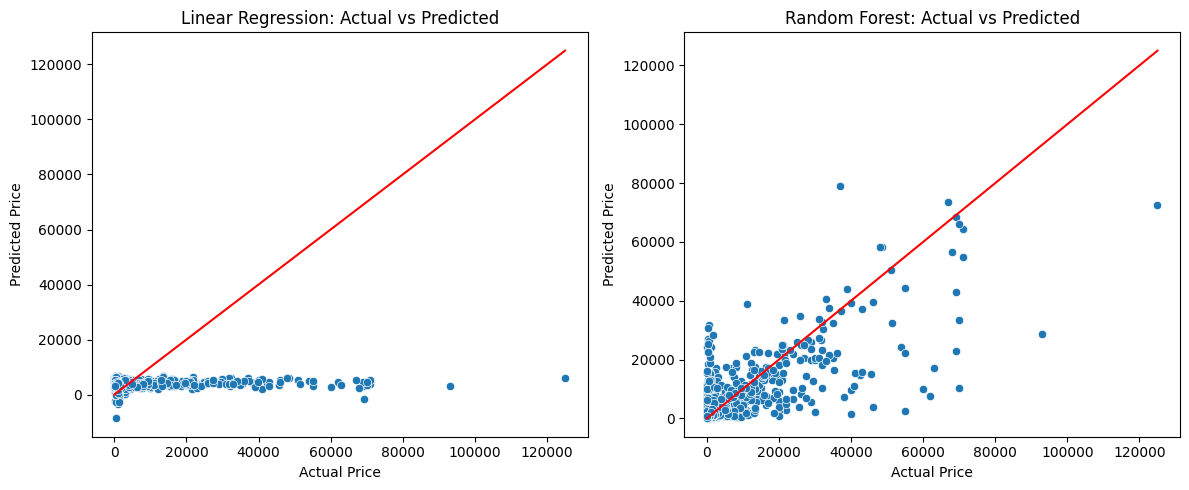

In [41]:
# Get predictions from both models
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)   # 1 row, 2 columns, first plot
sns.scatterplot(x=y_test, y=lr_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color="red")  # reference straight line


# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color="red")

plt.tight_layout()
plt.show()